# Figures pour le papier

## Spectrogrammes

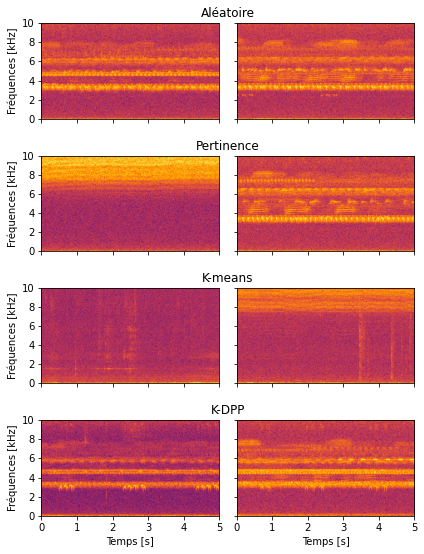

In [1]:
from affichageDonnees import displaySamplingsSpectrogram
from echantillonnages import sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp

nbSamples = 2
samplingNames = ["Aléatoire", "Pertinence", "K-means", "K-DPP"]
samplingFunctions = [sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp]
height = 2
width = 3
descriptorName = 'scalogramStat4'
J = 12
Q = 3
pertinenceFunction = 'inverse'
soundsRoot = './data/sounds'
cmap = 'inferno'
title = ""
labelFontSize = 10
labelFontWeight = 'normal'
subtitlesFontSize = 12
subtitlesFontWeight = 'normal'
titleFontSize = 13
titleFontWeight = 'semibold'


displaySamplingsSpectrogram(nbSamples, samplingNames, samplingFunctions, height, width, descriptorName, J, Q, pertinenceFunction, soundsRoot, cmap, title, labelFontSize, labelFontWeight, subtitlesFontSize, subtitlesFontWeight, titleFontSize, titleFontWeight)

## Evolution du nombres d'oiseaux en fonction de k

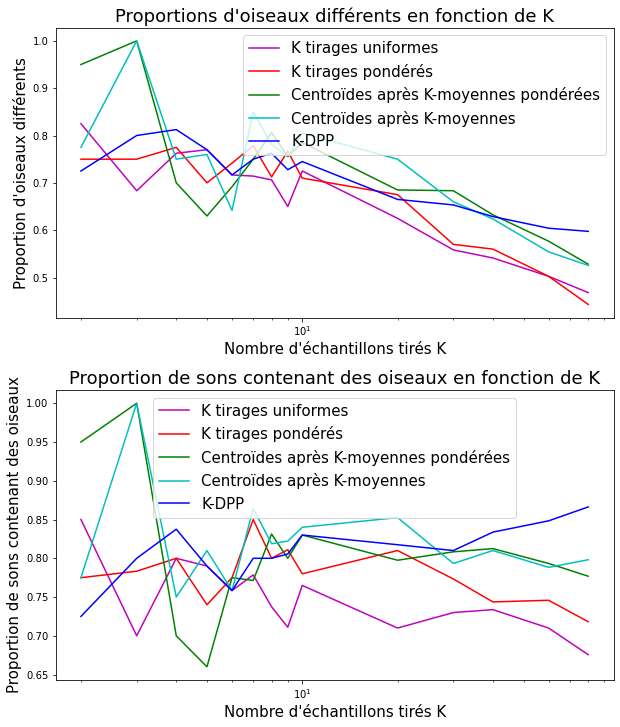

In [2]:
from affichageDonnees import displayDoubleOracle

sampling_names = ["Random", "Pertinence", "WeightedK-means", "K-means", "K-DPP"]
nbSamplesList = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 60, 80]
nbSamplings = 20
color_list = ['m', 'r', 'g', 'c', 'b']
descriptorName = 'scalogramStat1'
bird_search_mode = 'single'
bird_confidence_limit = 0.1
pertinenceFunction = 'identity'
J = 12
Q = 3

dispParams = {
   "title1": "Proportions d'oiseaux différents en fonction de K",
    "title2" : "Proportion de sons contenant des oiseaux en fonction de K",
    "x1label" : "Nombre d'échantillons tirés K",
    "x2label" : "Nombre d'échantillons tirés K",
    "y1label" : "Proportion d'oiseaux différents",
    "y2label" : "Proportion de sons contenant des oiseaux",
    "figureSize": (10,12), 
    "titleFontSize" : 18, 
    "titleFontWeight" : 'normal', 
    'labelFontSize' : 15, 
    'labelFontWeight' : 'normal',
    'legend' : ["K tirages uniformes", "K tirages pondérés", "Centroïdes après K-moyennes pondérées", "Centroïdes après K-moyennes", "K-DPP", "K-tirage optimaux (oracle)"],
    'legendFontSize' : 15,
    'hspace' : 0.25
    }
displayDoubleOracle(sampling_names, nbSamplesList, nbSamplings, bird_search_mode, bird_confidence_limit, pertinenceFunction, color_list, dispParams, descriptorName = descriptorName, J = J, Q = Q)


## Nuages de points pertinence/diversité

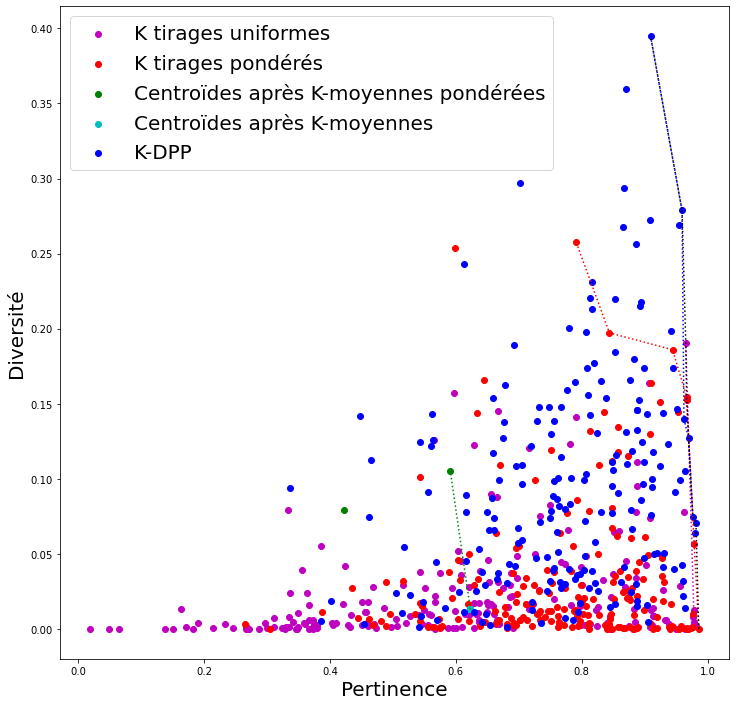

Number of points in the Pareto front per sampling
Random : 1
Pertinence : 3
WeightedK-means : 0
K-means : 0
K-DPP : 5

Area under the Pareto front per sampling
Random : 0.18539443156161203
Pertinence : 0.24067306373401962
WeightedK-means : 0.0641834046158102
K-means : 0.00828864455912168
K-DPP : 0.37852871313039854


In [3]:
from affichageDonnees import displaySamplingClouds

nbSamples = 3
nbSamplings = 200
samplingNames = ["Random", "Pertinence", "WeightedK-means", "K-means", "K-DPP"]
color_list = ['m', 'r', 'g', 'c', 'b']
descriptorName = 'scalogramStat1'
J = 12
Q = 3
pertinenceFunction = 'identity'
displayPareto = True
figSize = (12, 12)
title = ""
titleFontSize = 13
titleFontWeight = 'normal'
labelFontSize = 20
labelFontWeight = 'normal'
legendNames = ["K tirages uniformes", "K tirages pondérés", "Centroïdes après K-moyennes pondérées", "Centroïdes après K-moyennes", "K-DPP"]
xLabel = "Pertinence"
yLabel = "Diversité"


displaySamplingClouds(samplingNames, nbSamples, nbSamplings, color_list, descriptorName, J, Q, pertinenceFunction, displayPareto, title, xLabel, yLabel, figSize, labelFontSize, labelFontWeight, titleFontSize, titleFontWeight, legendNames)

Loading descriptors from persisted file
Loading pertinences from persisted file


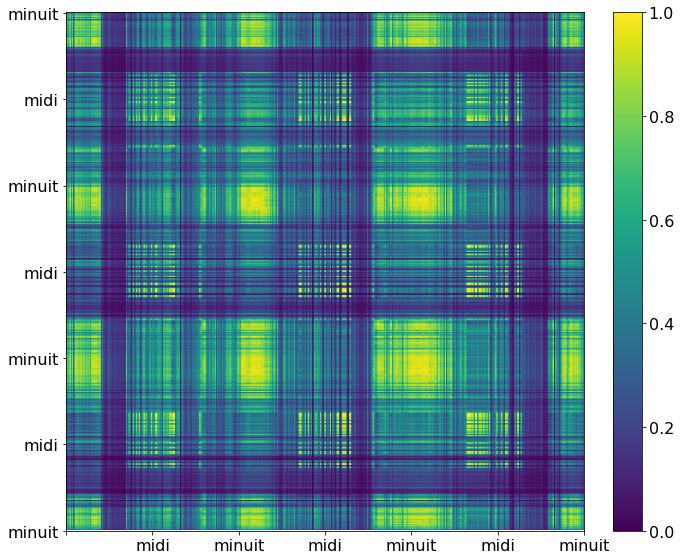

In [4]:
from affichageDonnees import displayLikelyhoodKernel

dispParams = {
   "title": "",
    "xlabel" : "Nombre d'échantillons",
    "ylabel" : "Nombre de oiseaux dans chaque échantillon",
    "figureSize": (8,8), 
    "titleFontSize" : 20, 
    "titleFontWeight" : 'normal', 
    'labelFontSize' : 15, 
    'labelFontWeight' : 'normal',
    'labelsFontSize' : 16,
    'labels' : ['minuit', 'midi', 'minuit', 'midi', 'minuit', 'midi', 'minuit'],
    'labels2' : ['', 'midi', 'minuit', 'midi', 'minuit', 'midi', 'minuit']
    }
displayLikelyhoodKernel(J = 12, Q = 3, dispParams = dispParams)